In [1]:
# libraries
import seaborn as sns
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the health expenditure dataset
healthexp = sns.load_dataset("healthexp")

# Display the first few rows of the dataset
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


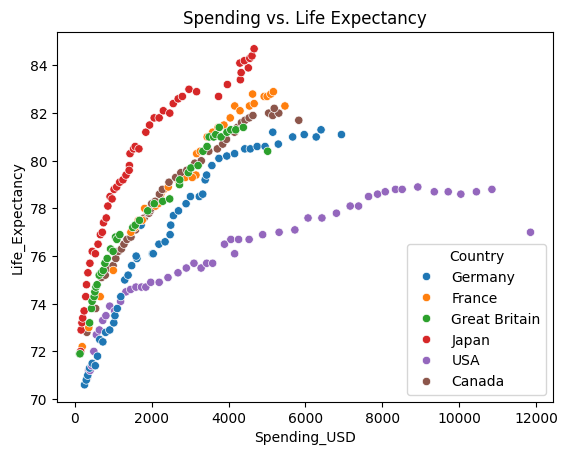

In [2]:
# Display basic information about the dataset
healthexp.info()

# Display summary statistics
healthexp.describe()

# Scatterplot to visualize relationships
sns.scatterplot(data=healthexp, x='Spending_USD', y='Life_Expectancy', hue='Country')
plt.title("Spending vs. Life Expectancy")
plt.show()

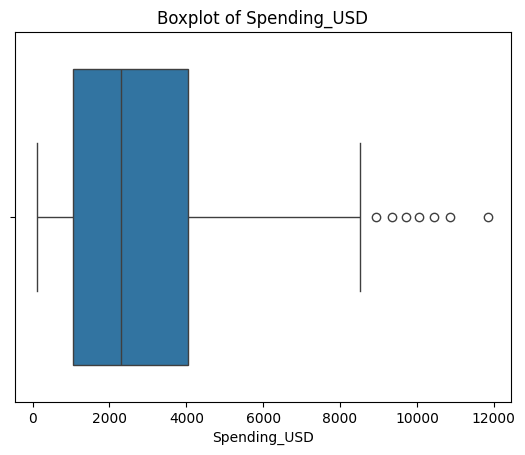

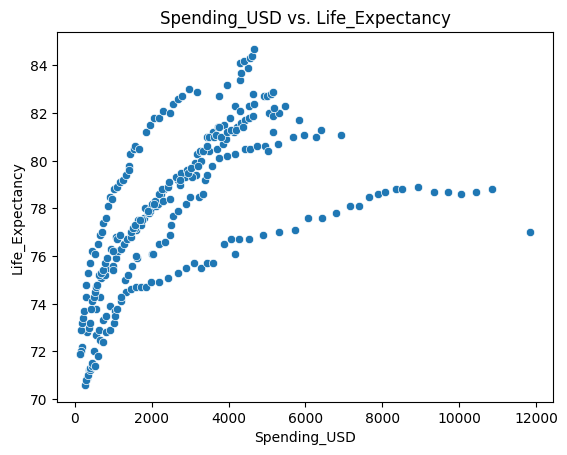

In [3]:
import seaborn as sns

# Boxplot to identify potential outliers in Spending_USD
sns.boxplot(x=healthexp['Spending_USD'])
plt.title("Boxplot of Spending_USD")
plt.show()

# Scatterplot of Spending_USD vs. Life_Expectancy to identify unusual patterns
sns.scatterplot(x=healthexp['Spending_USD'], y=healthexp['Life_Expectancy'])
plt.title("Spending_USD vs. Life_Expectancy")
plt.show()


In [4]:
# One-hot encode the 'Country' column
data_encoded = pd.get_dummies(healthexp, columns=['Country'])

# Display the encoded data
data_encoded.head()


,Year,Spending_USD,Life_Expectancy,Country_Canada,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,1970,252.311,70.6,False,False,True,False,False,False
1,1970,192.143,72.2,False,True,False,False,False,False
2,1970,123.993,71.9,False,False,False,True,False,False
3,1970,150.437,72.0,False,False,False,False,True,False
4,1970,326.961,70.9,False,False,False,False,False,True


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = data_encoded[['Spending_USD', 'Country_France', 'Country_Germany', 'Country_Great Britain', 'Country_Japan', 'Country_USA']]
y = data_encoded['Life_Expectancy']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple linear regression model
linear_regression = LinearRegression()

# Train the model with the training set
linear_regression.fit(X_train, y_train)


LinearRegression()

In [6]:
# Make predictions with the testing data
y_pred = linear_regression.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2.3013732097838697
R-squared: 0.8114954509821513


In [7]:
# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Stacking Regressor with Gradient Boosting and Random Forest
stacking_regressor = StackingRegressor(
    estimators=[
        ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)),
        ('rf', RandomForestRegressor(n_estimators=100, max_depth=None))
    ],
    final_estimator=LinearRegression(fit_intercept=False)
)

# Train the Stacking Regressor with the scaled data
stacking_regressor.fit(X_train_scaled, y_train)

# Test the Stacking Regressor with the testing set
y_pred_stack = stacking_regressor.predict(X_test_scaled)

# Calculate MSE and R-squared
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Stacking Regressor - Mean Squared Error:", mse_stack)
print("Stacking Regressor - R-squared:", r2_stack)


Stacking Regressor - Mean Squared Error: 0.08705612533480321
Stacking Regressor - R-squared: 0.9928692679763055


In [8]:


# Define a threshold for capping Spending_USD
threshold = 8500

# Cap outliers in Spending_USD
data_capped = data_encoded.copy()
data_capped.loc[data_capped['Spending_USD'] > threshold, 'Spending_USD'] = threshold

print("Data after capping outliers:")
print(data_capped)


Data after capping outliers:
     Year  Spending_USD  Life_Expectancy  Country_Canada  Country_France  \
0    1970       252.311             70.6           False           False   
1    1970       192.143             72.2           False            True   
2    1970       123.993             71.9           False           False   
3    1970       150.437             72.0           False           False   
4    1970       326.961             70.9           False           False   
..    ...           ...              ...             ...             ...   
269  2020      6938.983             81.1           False           False   
270  2020      5468.418             82.3           False            True   
271  2020      5018.700             80.4           False           False   
272  2020      4665.641             84.7           False           False   
273  2020      8500.000             77.0           False           False   

     Country_Germany  Country_Great Britain  Country_Japan

In [9]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Create training and testing data from the cleaned dataset
X_train_cleaned = data_capped[['Spending_USD', 'Country_France', 'Country_Germany', 'Country_Great Britain', 'Country_Japan', 'Country_USA']]
y_train_cleaned = data_capped['Life_Expectancy']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)),
        ('rf', RandomForestRegressor(n_estimators=100, max_depth=None))
    ],
    final_estimator=LinearRegression(fit_intercept=False)
)

# Re-train the Stacking Regressor with the scaled data
stacking_regressor.fit(X_train_scaled, y_train_cleaned)

# Test the Stacking Regressor
y_pred_stack = stacking_regressor.predict(X_train_scaled)

# Calculate MSE and R-squared for the Stacking Regressor
mse_stack = mean_squared_error(y_train_cleaned, y_pred_stack)
r2_stack = r2_score(y_train_cleaned, y_pred_stack)

print("Stacking Regressor after cleaning - Mean Squared Error:", mse_stack)
print("Stacking Regressor after cleaning - R-squared:", r2_stack)

Stacking Regressor after cleaning - Mean Squared Error: 0.01962050986405643
Stacking Regressor after cleaning - R-squared: 0.9981654034749555
